# Desafío - Preparación de datos y gráficos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/world-data-2023.csv')

df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [ ]:
#verificamos el tipo de dato de cada columna y nos damos cuenta que algunas son del tipo object, siendo estas del tipo flotante
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [ ]:
# Función para limpiar columnas numéricas con porcentaje
def clean_percentage(column):
    return column.str.replace('%', '', regex=False).astype(float)

# Función para limpiar columnas monetarias
def clean_currency(column):
    return column.str.replace('[$,]', '', regex=True).astype(float)

# Función para limpiar columnas numéricas con comas
def clean_numeric(column):
    return column.str.replace(',', '', regex=False).astype(float)

# Limpiar columnas específicas
columns_to_clean_percentage = [
    "Agricultural Land( %)", "CPI Change (%)", "Forested Area (%)",
    "Gross primary education enrollment (%)", "Gross tertiary education enrollment (%)",
    "Out of pocket health expenditure", "Population: Labor force participation (%)",
    "Tax revenue (%)", "Total tax rate", "Unemployment rate"
]

columns_to_clean_currency = ["Gasoline Price", "GDP", "Minimum wage"]

columns_to_clean_numeric = ["Land Area(Km2)", "Armed Forces size", "Population", "Urban_population"]

for column in columns_to_clean_percentage:
    df[column] = clean_percentage(df[column])

for column in columns_to_clean_currency:
    df[column] = clean_currency(df[column])

for column in columns_to_clean_numeric:
    df[column] = clean_numeric(df[column])

df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,"8,672",149.9,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,"4,536",119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,"150,006",151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,"34,693",261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


1. Carga los datos y genera un dataFrame que excluya las columnas correspondientes

In [ ]:
# Excluir las columnas especificadas
columns_to_exclude = ['Abbreviation', 'Calling Code', 'capital',
                      'Currency-Code', 'Largest city', 'Official language',
                      'Latitude', 'Longitude']
df_filtrado = df.drop(columns=columns_to_exclude, errors='ignore')
df_filtrado.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60,58.1,652230.0,323000.0,32.49,Kabul,"8,672",149.9,2.3,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0
1,Albania,105,43.1,28748.0,9000.0,11.78,Tirana,"4,536",119.05,1.4,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0
2,Algeria,18,17.4,2381741.0,317000.0,24.28,Algiers,"150,006",151.36,2.0,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0
3,Andorra,164,40.0,468.0,NaN,7.20,Andorra la Vella,469,NaN,NaN,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,NaN,NaN,6.63,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0
4,Angola,26,47.5,1246700.0,117000.0,40.73,Luanda,"34,693",261.73,17.1,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0


In [ ]:
# Inspección inicial
print("\nInformación del dataframe filtrado:")
print(df_filtrado.info())
print("\nEstadísticas descriptivas:")
print(df_filtrado.describe())


Información del dataframe filtrado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Agricultural Land( %)                      188 non-null    float64
 3   Land Area(Km2)                             194 non-null    float64
 4   Armed Forces size                          171 non-null    float64
 5   Birth Rate                                 189 non-null    float64
 6   Capital/Major City                         192 non-null    object 
 7   Co2-Emissions                              188 non-null    object 
 8   CPI                                        178 non-null    object 
 9   CPI Change (%)                             179 non-null    fl

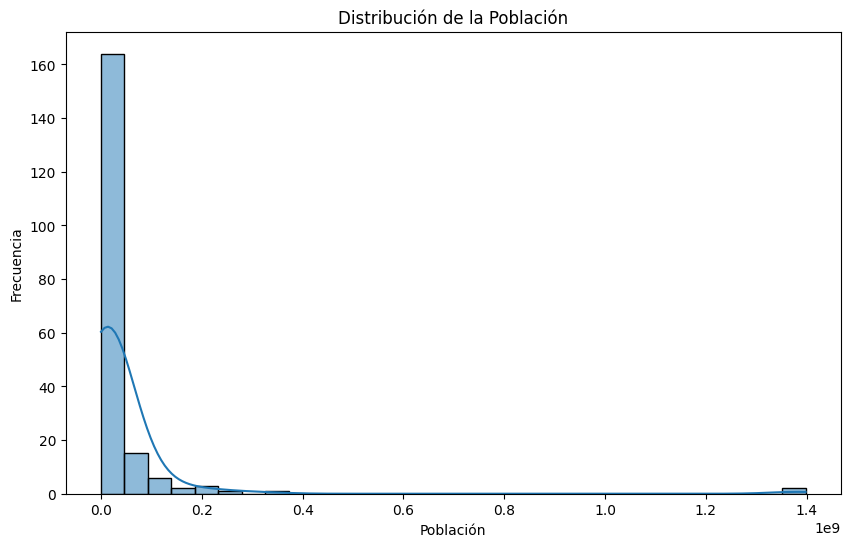

In [ ]:
# Visualización gráfica
# Histograma para analizar la distribución de una columna numérica (ejemplo: Población)

plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['Population'], bins=30, kde=True)
plt.title('Distribución de la Población')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.show()

2. De las variables codificadas numéricamente, ¿hay pares de ellas en la que parezca
haber correlación? ¿Para cuál(es) de ellas se observa más claramente?


Matriz de correlación:
                                           Agricultural Land( %)  \
Agricultural Land( %)                                   1.000000   
Land Area(Km2)                                         -0.031189   
Armed Forces size                                       0.030547   
Birth Rate                                              0.199269   
CPI Change (%)                                         -0.010878   
Fertility Rate                                          0.180507   
Forested Area (%)                                      -0.434570   
Gasoline Price                                          0.047724   
GDP                                                     0.051840   
Gross primary education enrollment (%)                 -0.047046   
Gross tertiary education enrollment (%)                -0.111015   
Infant mortality                                        0.207010   
Life expectancy                                        -0.243771   
Maternal mortality ratio

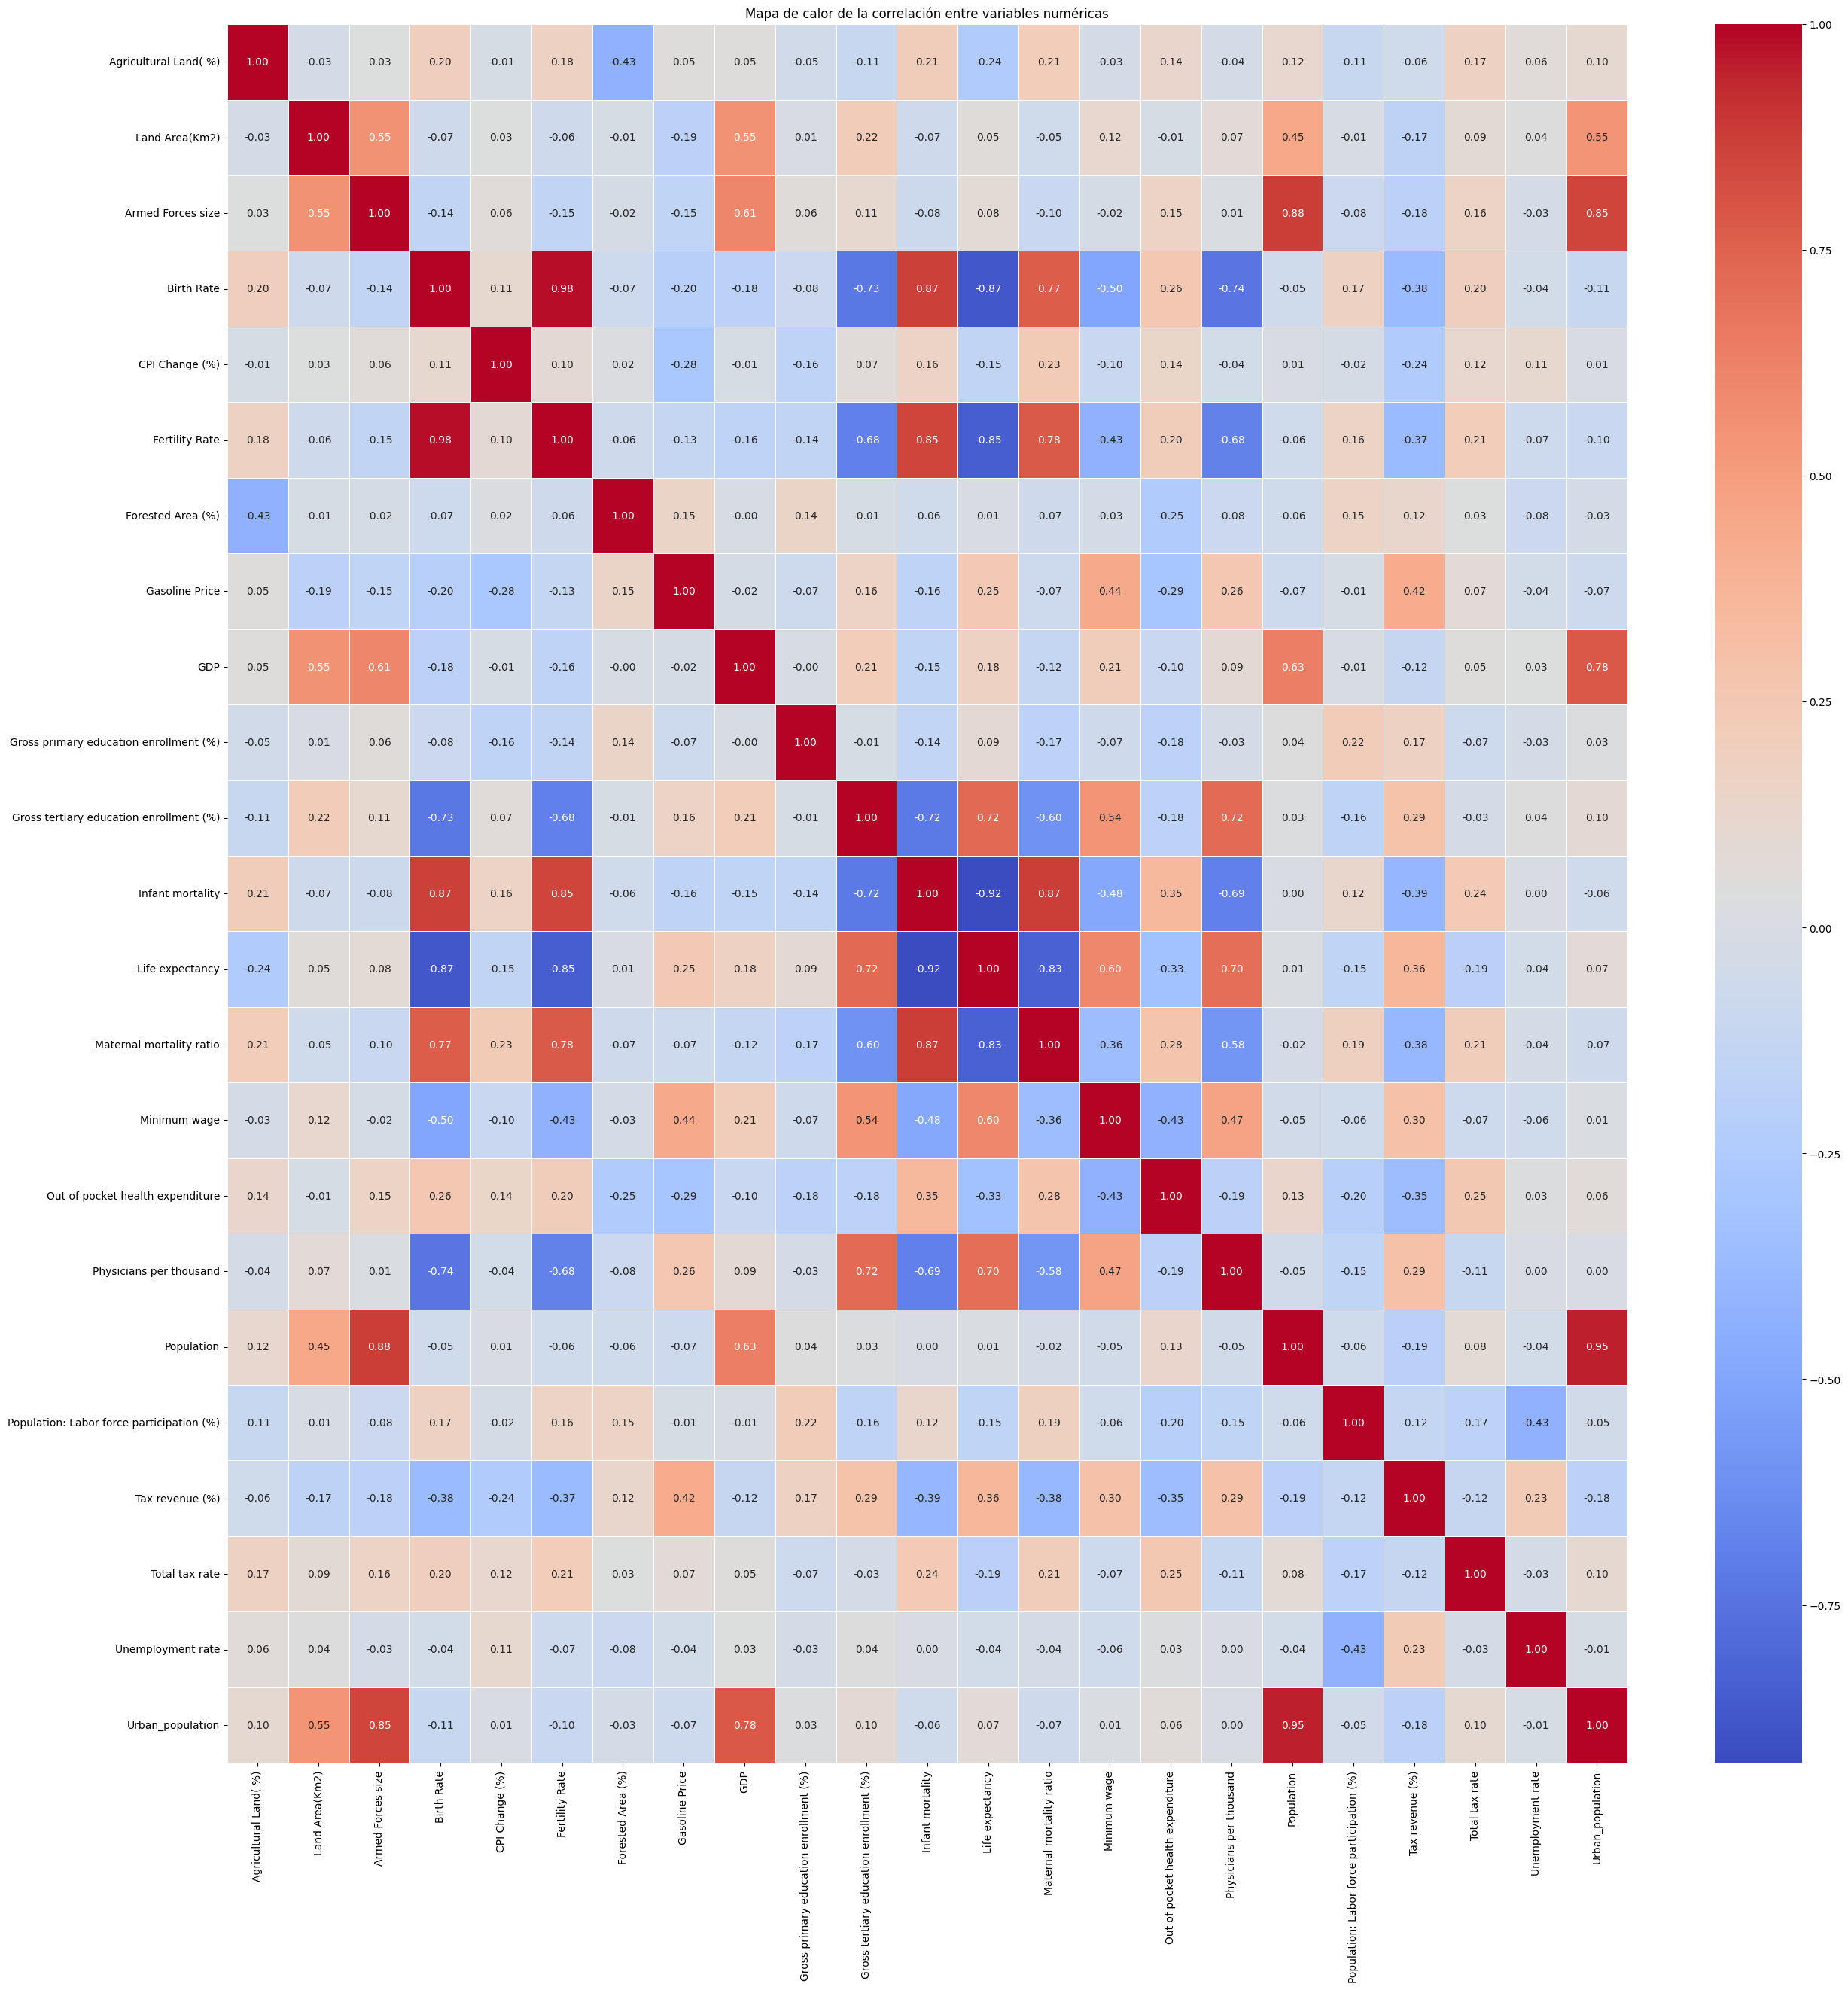

In [ ]:
# Filtrar solo las columnas numéricas
numerical_columns = df_filtrado.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

para analizar este resultado debemos tomar en cuenta que si la correlación entre dos variables tiene un valor cercano a +1 o -1, indica una relación lineal fuerte.
Los valores cercanos a +1 muestran una correlación positiva, mientras que los cercanos a -1 indican una correlación negativa. En nuestro caso las correlaciones mas fuertes son entre mortalidad infantil y la tasa de natalidad, tambien mortalidad infantil con tasa defertilidad, del mismo modo expectativa de vida esta relacionada con tasa de natalidad y tasa de fertilidad, pero las relaciónes mas fuertes observadas fueron la tasa de mortalidad materna y expectativa de vida con un 0,87 y la de expectativa de vida y la de mortalidad infantil con un 0,92. En el siguiente gráfico se puede observas mas claramente.

<Axes: xlabel='Maternal mortality ratio', ylabel='Life expectancy'>

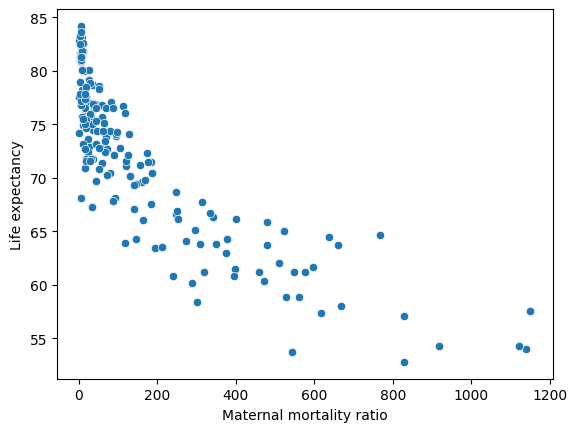

In [ ]:
sns.scatterplot(data=df, x='Maternal mortality ratio', y='Life expectancy')

<Axes: xlabel='Infant mortality', ylabel='Life expectancy'>

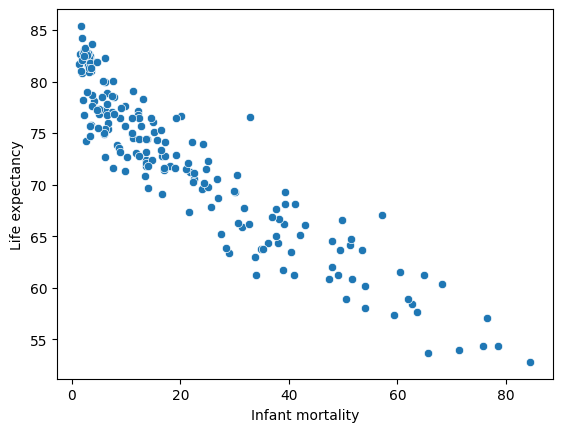

In [ ]:
sns.scatterplot(data=df, x='Infant mortality', y='Life expectancy')

3. Considera los dos pares de variables anteriores y elimina en cada caso los faltantes
y atípicos. Justifica en cada caso tu procedimiento.

In [ ]:
df_filtrado.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60,58.1,652230.0,323000.0,32.49,Kabul,"8,672",149.9,2.3,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0
1,Albania,105,43.1,28748.0,9000.0,11.78,Tirana,"4,536",119.05,1.4,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0
2,Algeria,18,17.4,2381741.0,317000.0,24.28,Algiers,"150,006",151.36,2.0,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0
3,Andorra,164,40.0,468.0,NaN,7.20,Andorra la Vella,469,NaN,NaN,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,NaN,NaN,6.63,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0
4,Angola,26,47.5,1246700.0,117000.0,40.73,Luanda,"34,693",261.73,17.1,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0


In [ ]:
#  Eliminar valores faltantes y atípicos
# 1er par de variables: 'Tasa de mortalidad materna' y 'Expectativa de vida'
variables_par1 = ['Maternal mortality ratio', 'Life expectancy']
df_par1 = df_filtrado[variables_par1].dropna()  # Eliminar filas con valores faltantes

# Eliminar outliers usando el rango intercuartílico (IQR)
Q1_par1 = df_par1.quantile(0.25)
Q3_par1 = df_par1.quantile(0.75)
IQR_par1 = Q3_par1 - Q1_par1
df_par1_cleaned = df_par1[~((df_par1 < (Q1_par1 - 1.5 * IQR_par1)) | (df_par1 > (Q3_par1 + 1.5 * IQR_par1))).any(axis=1)]
print("\nDatos del primer par después de limpiar faltantes y atípicos:")
print(df_par1_cleaned.describe())


Datos del primer par después de limpiar faltantes y atípicos:
       Maternal mortality ratio  Life expectancy
count                158.000000       158.000000
mean                  84.917722        74.009494
std                  103.288352         5.949231
min                    2.000000        58.400000
25%                   10.000000        70.500000
50%                   38.000000        74.450000
75%                  120.750000        78.175000
max                  401.000000        84.200000


In [ ]:
# 2do par de variables: Expectativa de vida y Mortalidad Infantil
variables_par2 = ['Life expectancy', 'Infant mortality']
df_par2 = df_filtrado[variables_par2].dropna()  # Eliminar filas con valores faltantes

# Eliminar outliers usando el rango intercuartílico (IQR)
Q1_par2 = df_par2.quantile(0.25)
Q3_par2 = df_par2.quantile(0.75)
IQR_par2 = Q3_par2 - Q1_par2
df_par2_cleaned = df_par2[~((df_par2 < (Q1_par2 - 1.5 * IQR_par2)) | (df_par2 > (Q3_par2 + 1.5 * IQR_par2))).any(axis=1)]

print("\nDatos del segundo par después de limpiar faltantes y atípicos:")
print(df_par2_cleaned.describe())


Datos del segundo par después de limpiar faltantes y atípicos:
       Life expectancy  Infant mortality
count       182.000000        182.000000
mean         72.608791         20.278571
std           7.061649         17.849965
min          53.700000          1.400000
25%          67.625000          6.025000
50%          73.500000         13.800000
75%          77.550000         31.125000
max          85.400000         71.400000


Se eliminan las filas con valores faltantes para garantizar que los cálculos de correlación y análisis posteriores no sean afectados por datos incompletos.
En caso de que una columna tenga una alta cantidad de valores faltantes, se podría considerar imputarlos (p. ej., con la mediana).
Los atípicos se identifican utilizando el rango intercuartílico (IQR), un método robusto y ampliamente usado que no se ve influenciado por valores extremos.
Los valores fuera del rango [Q1−1.5⋅IQR,Q3+1.5⋅IQR] se eliminan, ya que pueden distorsionar el análisis de correlación.

4. Construye un gráfico para verificar la correlación entre estas variables, ahora con los
datos preparados. Compara con lo obtenido anteriormente.

Text(0, 0.5, 'Life expectancy')

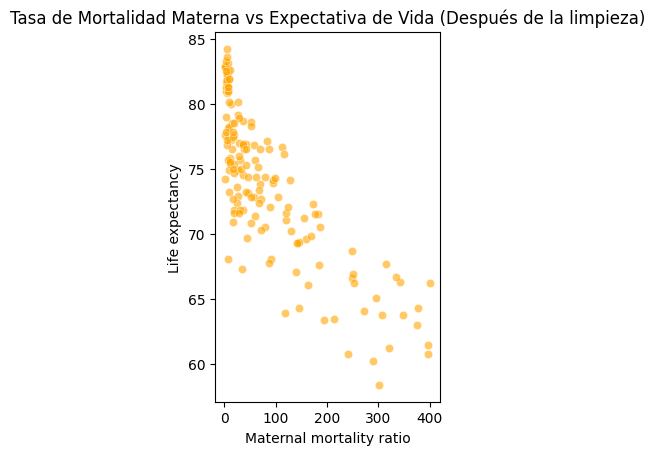

In [ ]:
# 1er par: Tasa de Mortalidad Materna vs Espectativa de vida
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_par1_cleaned, x='Maternal mortality ratio', y='Life expectancy', alpha=0.6, color='orange')
plt.title('Tasa de Mortalidad Materna vs Expectativa de Vida (Después de la limpieza)')
plt.xlabel('Maternal mortality ratio')
plt.ylabel('Life expectancy')



In [ ]:
correlation_par1_after = df_par1_cleaned.corr().iloc[0, 1]
print(f"Correlación entre 'Maternal mortality ratio' y 'Life expectancy' después de la limpieza: {correlation_par1_after}")

Correlación entre 'Maternal mortality ratio' y 'Life expectancy' después de la limpieza: -0.8138596692272025


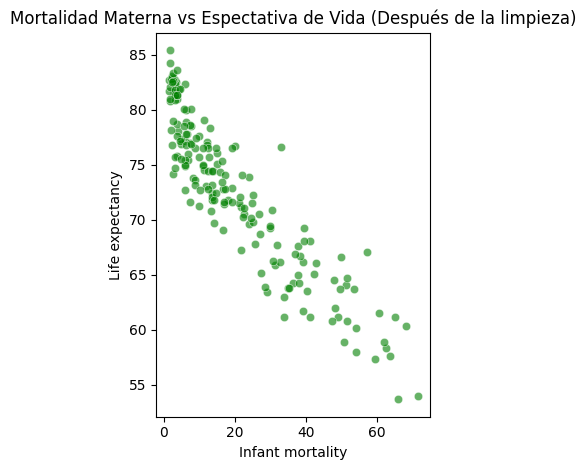

In [ ]:
# 2do par: Expectativa de vida vs 'Mortalidad Infantil'
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_par2_cleaned, x='Infant mortality', y='Life expectancy', alpha=0.6, color='green')
plt.title('Mortalidad Materna vs Espectativa de Vida (Después de la limpieza)')
plt.xlabel('Infant mortality')
plt.ylabel('Life expectancy')

plt.tight_layout()
plt.show()

In [ ]:
correlation_par2_after = df_par2_cleaned.corr().iloc[0, 1]
print(f"Correlación entre 'Infant mortality' y 'Life expectancy' después de la limpieza: {correlation_par2_after}")

Correlación entre 'Infant mortality' y 'Life expectancy' después de la limpieza: -0.9158443765709414


para ambos casos se observa que los valores estan influenciados por los valores extremos porque se obtuvieron valores en el primer caso de 0,87 antes y de 0,81 despues de la limpieza, para el segundo caso se obtuvieron valores de 0,92 antes y de 0,916 despues de la limpieza, sin embargo se puede concluir que estos valores reflejan una mejor correlación ya que los valores extremos o faltantes han sido ekiminados.

5. Realiza lo mismo para comparar la cantidad de médicos por cada mil personas y la
esperanza de vida. ¿Qué puedes concluir?

In [ ]:
variables = ['Physicians per thousand', 'Life expectancy']
df_medicos_esperanza = df_filtrado[variables].dropna()
df_medicos_esperanza.head()

,Physicians per thousand,Life expectancy
0,0.28,64.5
1,1.20,78.5
2,1.72,76.7
4,0.21,60.8
5,2.76,76.9


In [ ]:
# Datos originales (antes de limpieza)
df_medicos_vida = df_filtrado[variables].dropna()

# Calcular la correlación antes de la limpieza
correlation_before = df_medicos_vida.corr().iloc[0, 1]
print(f"Correlación antes de la limpieza: {correlation_before:.2f}")

Correlación antes de la limpieza: 0.70


El valor obtenido anteriormente se puede verificar en el mapa de correlaciones

In [ ]:
# Eliminar outliers usando el rango intercuartílico (IQR)
Q1 = df_medicos_vida.quantile(0.25)
Q3 = df_medicos_vida.quantile(0.75)
IQR = Q3 - Q1
df_medicos_vida_cleaned = df_medicos_vida[~((df_medicos_vida < (Q1 - 1.5 * IQR)) |
                                                (df_medicos_vida > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Calcular la correlación después de la limpieza
correlation_after = df_medicos_vida_cleaned.corr().iloc[0, 1]
print(f"Correlación después de la limpieza: {correlation_after:.2f}")

Correlación después de la limpieza: 0.74


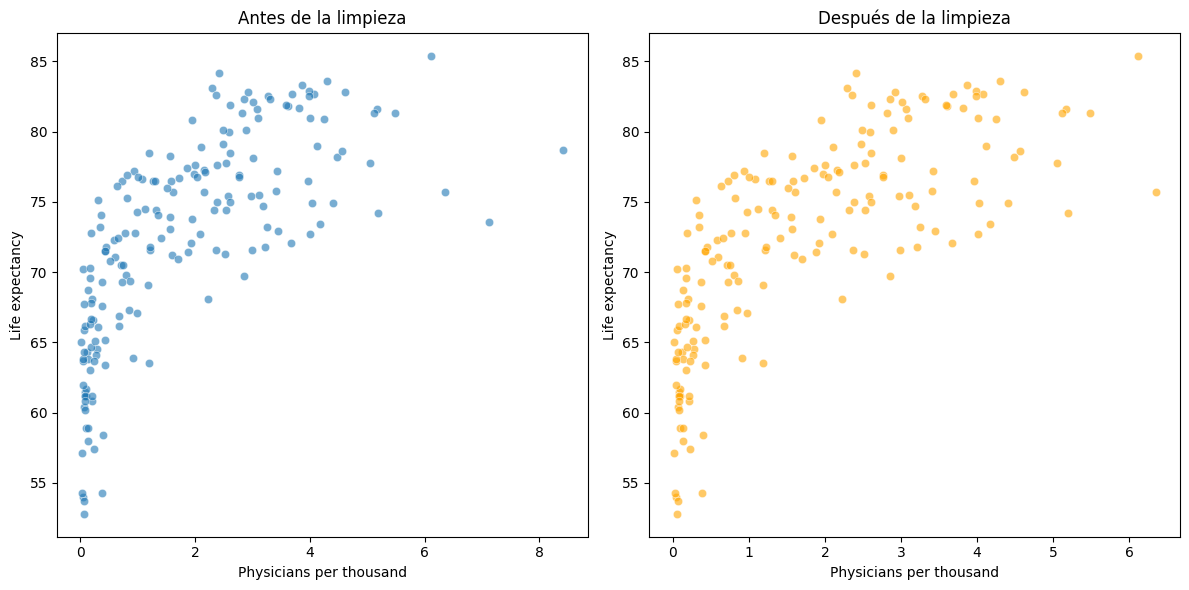

In [ ]:
# Graficar antes y después de la limpieza
plt.figure(figsize=(12, 6))

# Gráfico antes de la limpieza
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_medicos_vida, x=variables[0], y=variables[1], alpha=0.6)
plt.title('Antes de la limpieza')
plt.xlabel(variables[0])
plt.ylabel(variables[1])

# Gráfico después de la limpieza
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_medicos_vida_cleaned, x=variables[0], y=variables[1], alpha=0.6, color='orange')
plt.title('Después de la limpieza')
plt.xlabel(variables[0])
plt.ylabel(variables[1])

plt.tight_layout()
plt.show()

El aumento de la correlación de 0.70 a 0.74 después de la limpieza sugiere que los valores atípicos y faltantes estaban afectando ligeramente la relación entre la cantidad de médicos por cada mil personas y la esperanza de vida. Este incremento en la correlación permite realizar algunas conclusiones clave: La correlación de 0.74 indica una relación positiva fuerte: a mayor cantidad de médicos disponibles, mayor es la esperanza de vida. La eliminación de outliers mejoró la precisión del análisis, ya que estos valores extremos probablemente no reflejaban la tendencia general de los datos.


6. Construye un gráfico para representar la población total de los países y su producto
interno bruto. Prepara los datos y escoge el gráfico adecuado (si es necesario, limpia
y/o transforma los datos). Justifica.

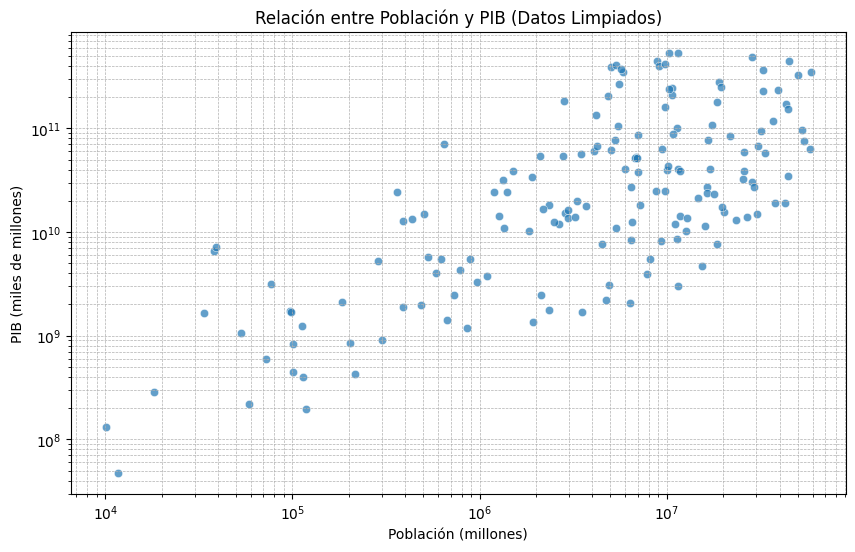

In [ ]:
# Seleccionar las columnas de interés
variables_poblacion_pib = ['Population', 'GDP']
df_poblacion_pib = df_filtrado[variables_poblacion_pib].dropna()

# Limpiar valores atípicos usando IQR
Q1 = df_poblacion_pib.quantile(0.25)
Q3 = df_poblacion_pib.quantile(0.75)
IQR = Q3 - Q1
df_poblacion_pib_cleaned = df_poblacion_pib[~((df_poblacion_pib < (Q1 - 1.5 * IQR)) |
                                              (df_poblacion_pib > (Q3 + 1.5 * IQR))).any(axis=1)]

# Graficar la relación Población vs PIB
plt.figure(figsize=(10, 6))

# Gráfico de dispersión
sns.scatterplot(data=df_poblacion_pib_cleaned, x='Population', y='GDP', alpha=0.7)
plt.title('Relación entre Población y PIB (Datos Limpiados)')
plt.xlabel('Población (millones)')
plt.ylabel('PIB (miles de millones)')
plt.xscale('log')  # Escala logarítmica para población (opcional)
plt.yscale('log')  # Escala logarítmica para PIB (opcional)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

Para representar la relación entre la población total y el producto interno bruto, el gráfico de dispersión es ideal, ya que permite visualizar cómo varía el PIB en función de la población. Este enfoque permite explorar si existe una tendencia por ejemplo vemos que países con mayor población tienden a tener un PIB más alto.